In [1]:
# Preparation
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
import seaborn as sns

from src.fitness_landscape import *
from src.time_series_generation import *

cmap = plt.get_cmap("tab10")
sns.set_style("ticks")
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})
matplotlib.rcParams.update({"font.size": 14})
matplotlib.rcParams.update({"axes.labelsize": 16})
matplotlib.rcParams.update({"legend.fontsize": 16})
matplotlib.rcParams.update({"xtick.labelsize": 16, "ytick.labelsize": 16})

os.makedirs("./plots/supplemental", exist_ok=True)
save_path = Path("./plots/supplemental")
env_list = pd.read_excel("./data/strain_num_matching.xlsx", index_col=0)

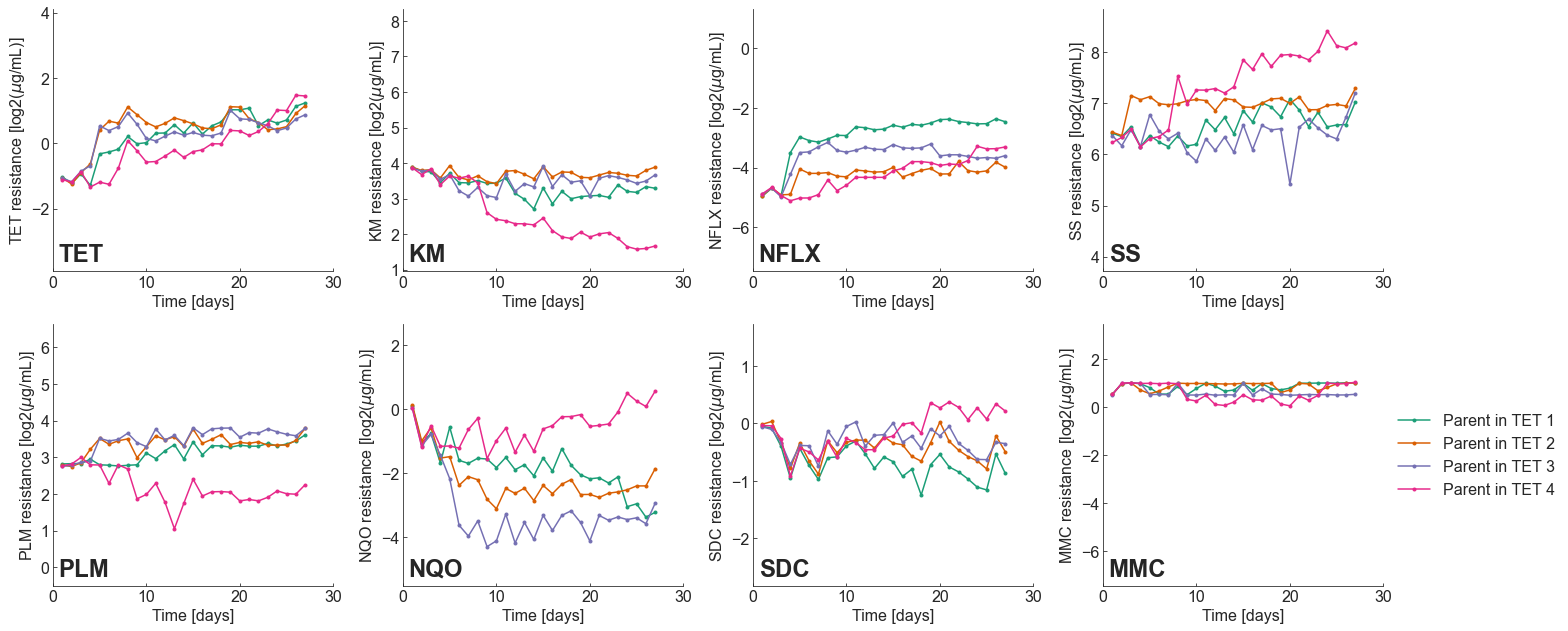

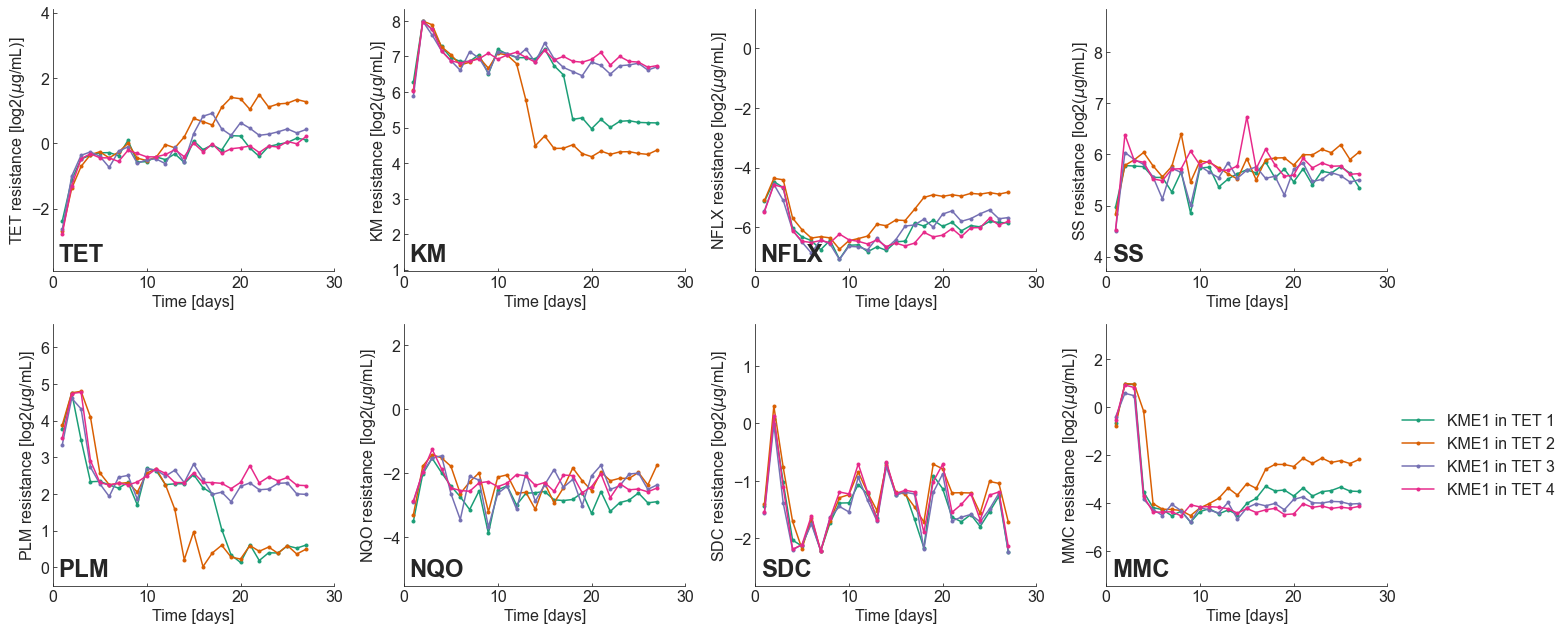

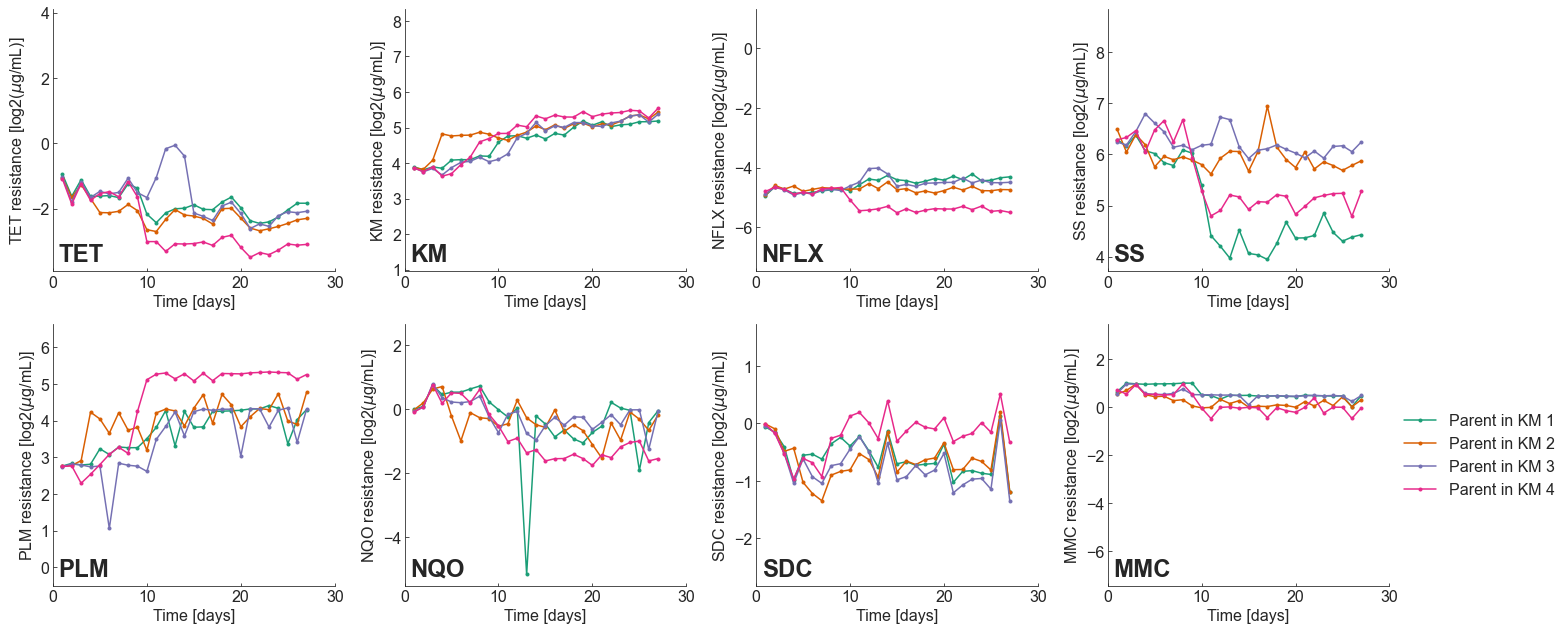

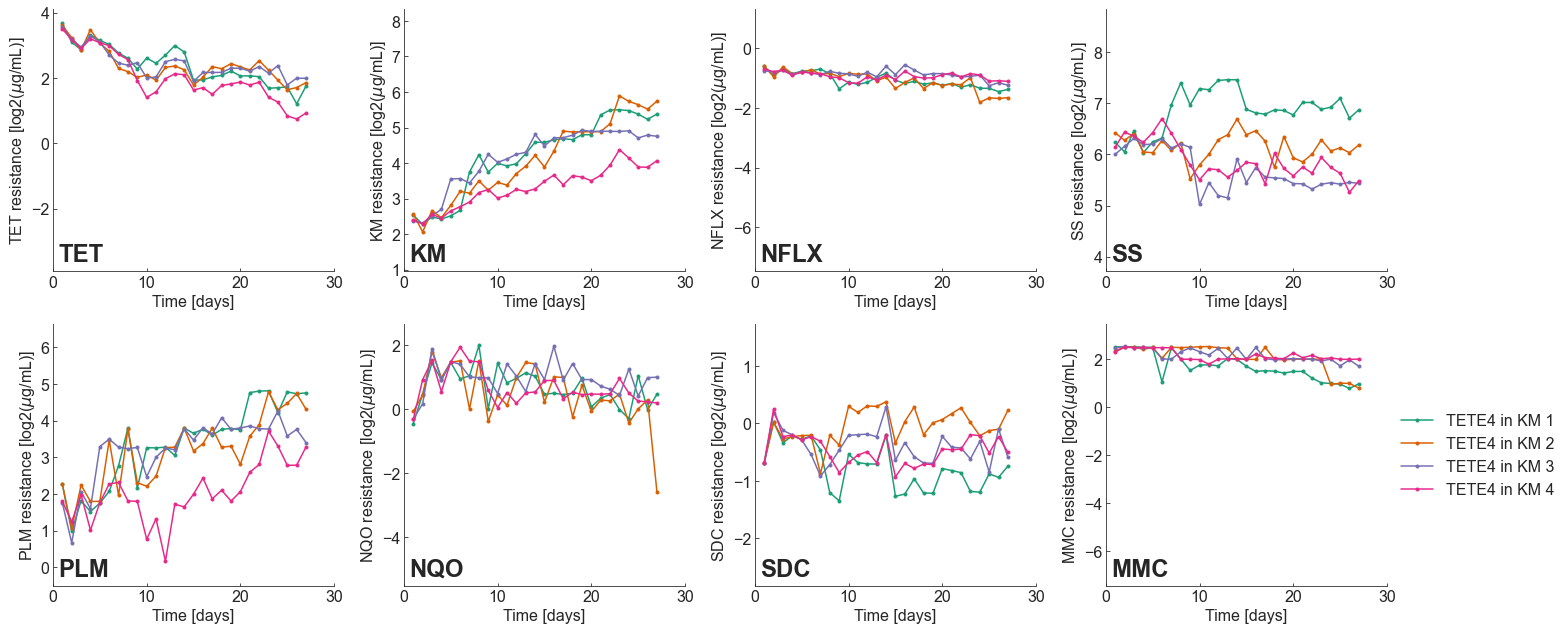

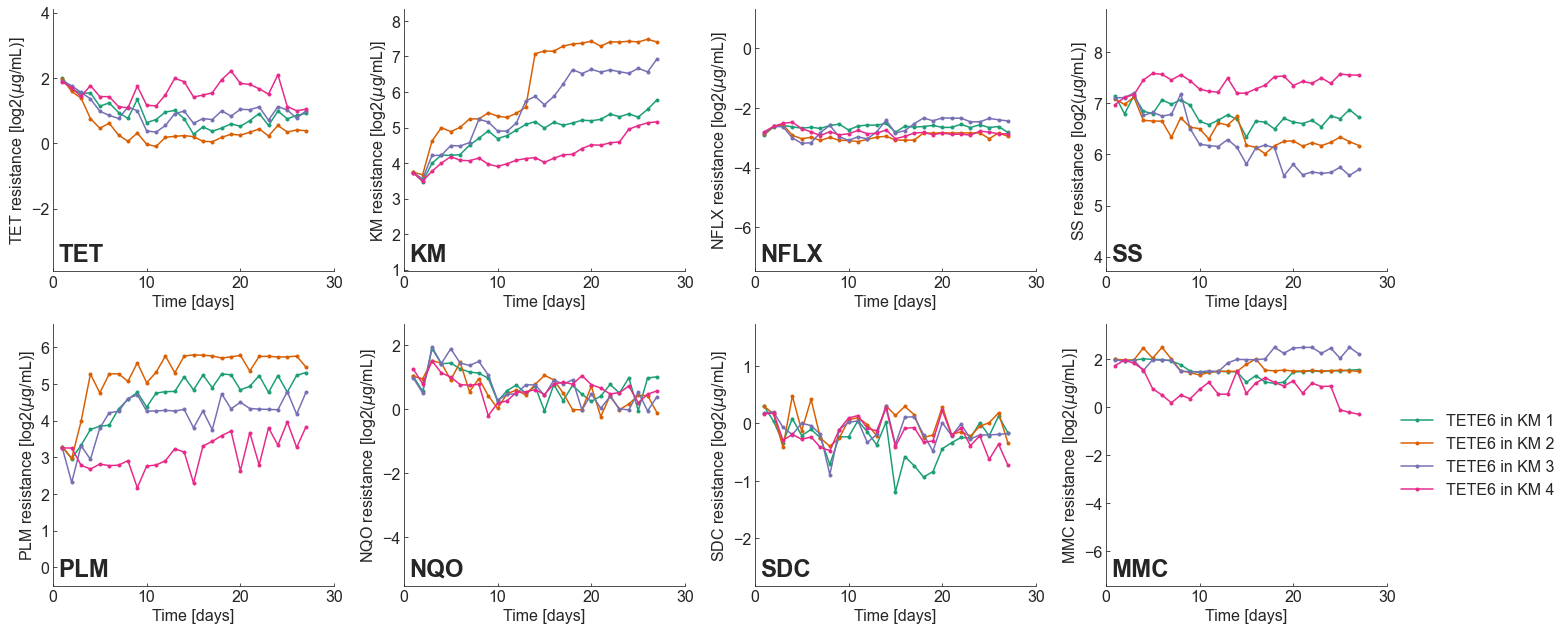

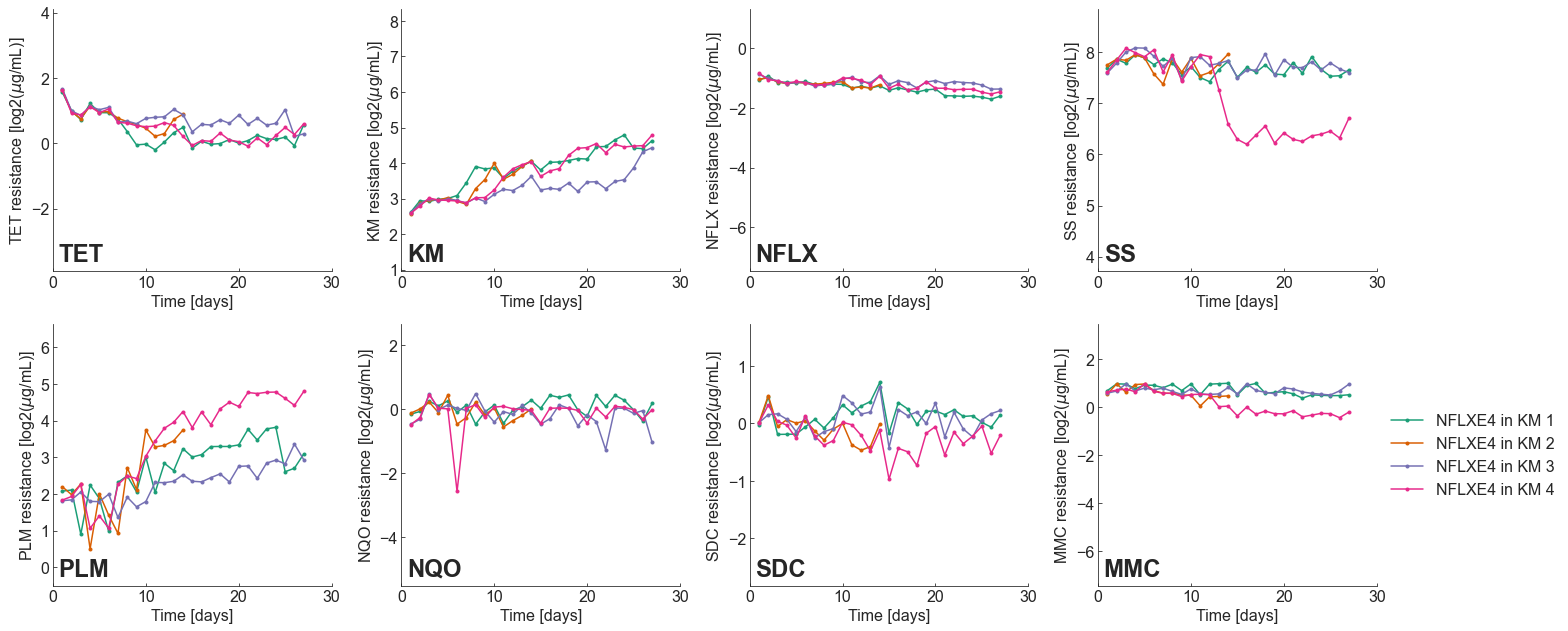

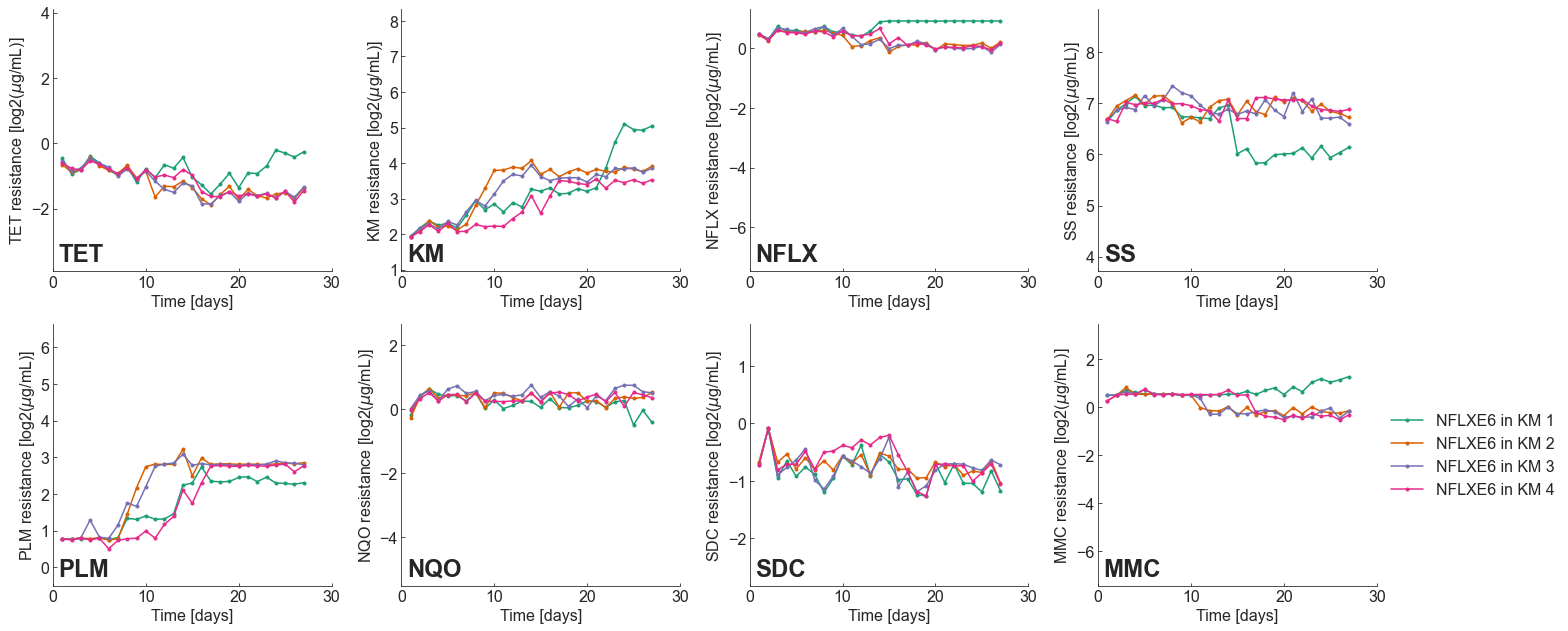

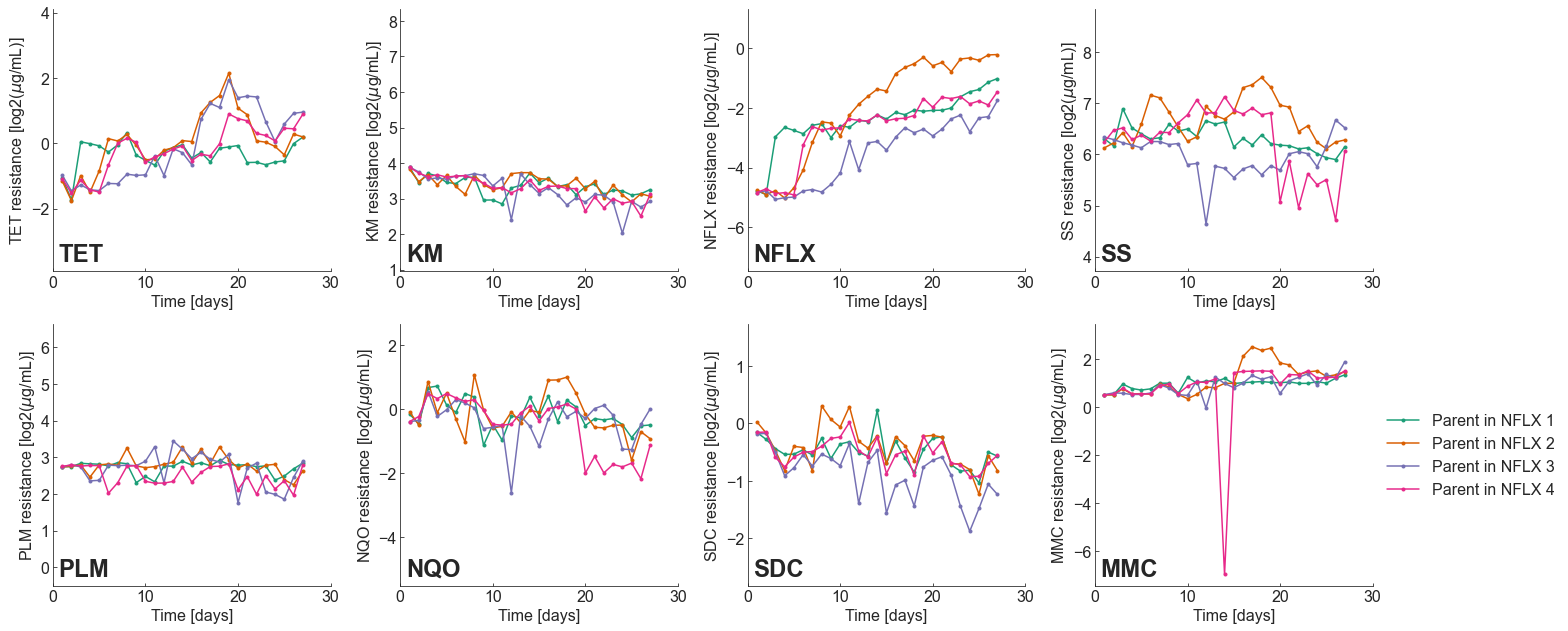

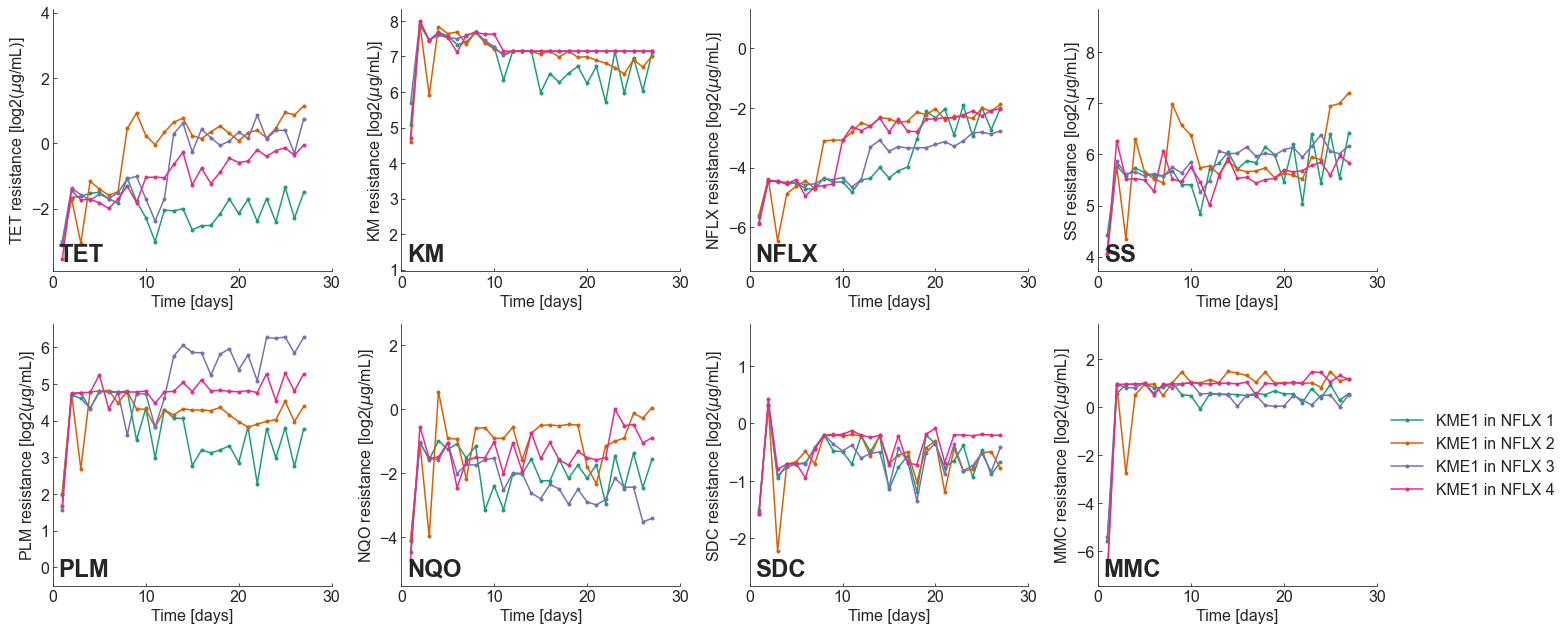

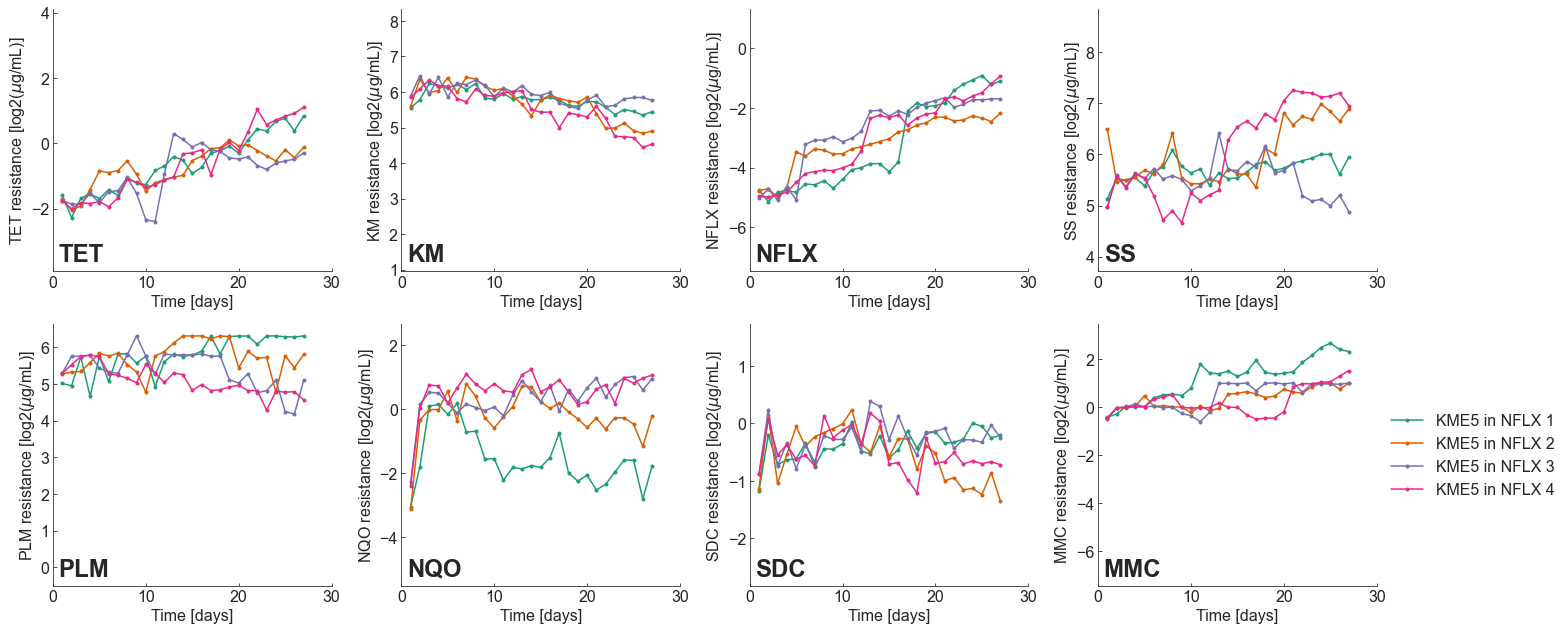

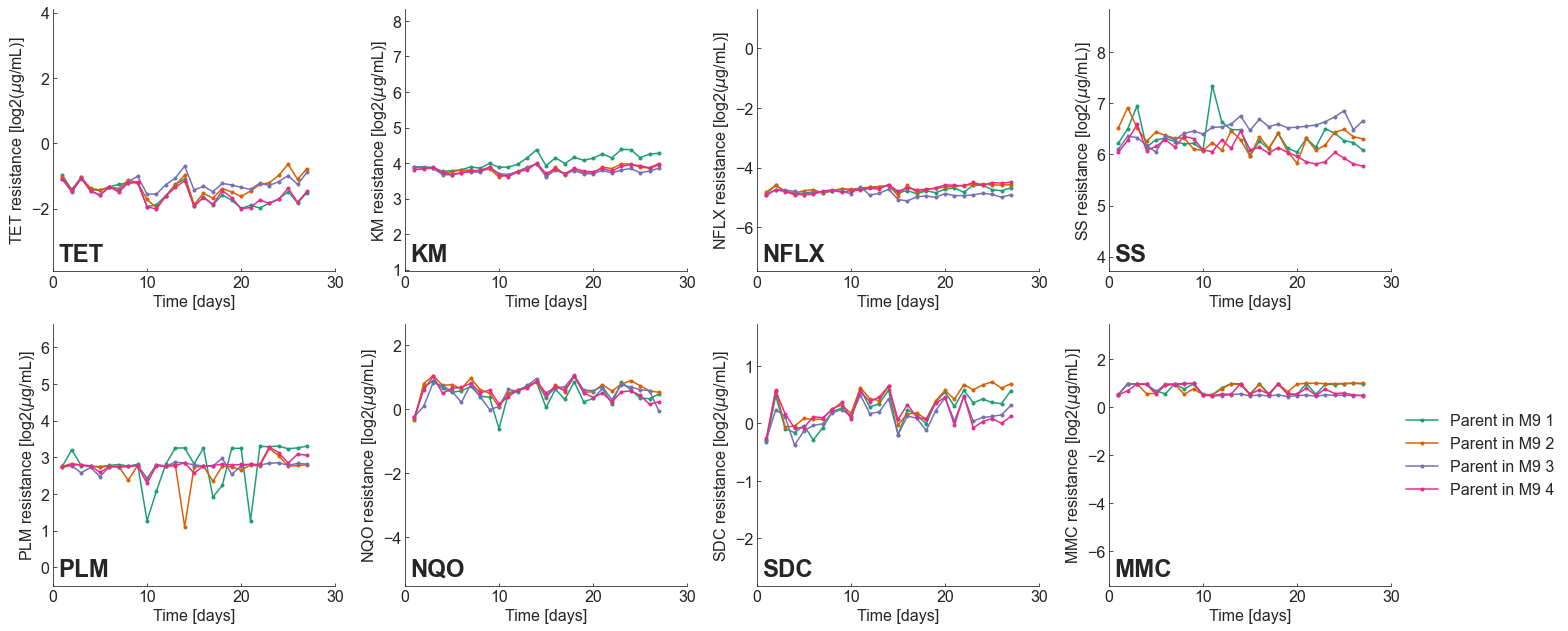

In [2]:
# plot resistance time series (Fig.S1 -- Fig.S11)
cmap2 = plt.get_cmap("Dark2")

# set parent resistance to day 0 data, and use relative resistance from Maeda 2020.
parent_bool = strain_name_df["strain_env"].str.contains("Parent").values
parent_index = strain_name_df.iloc[parent_bool].index.values

day0_ic50 = pd.DataFrame(index=stress_list)
day = 0
for strain in parent_index:
    df = pd.read_csv("./data/trajectories/strain" + str(strain) + ".csv",
                     index_col=0)
    day0_ic50["strain" + str(strain)] = df.iloc[:, day]
day0_mean = day0_ic50.mean(axis=1)

parent_ic50 = day0_mean

left, bottom = .02, .02  # parameters for locating stress names in the plot
top = .88
num_strains = 4

fig_num = 0
for start_strain in range(1, 49, 4):
    if start_strain == 9:
        continue

    plt.subplots(2, 4, figsize=(22, 9))

    for j, stress in enumerate(stress_list):
        ax = plt.subplot(2, 4, j + 1)

        for strain in range(1, 61):
            # environment and evolved strain
            plot_time_series(strain,
                             stress,
                             color=cmap(7),
                             marker='',
                             alpha=0,
                             print_title=False)

        for i, strain in enumerate(
                range(start_strain, start_strain + num_strains)):
            plot_time_series(strain,
                             stress,
                             color=cmap2(i),
                             zorder=3,
                             alpha=1,
                             i=i,
                             print_title=False,
                             label=env_list.iloc[start_strain, 0] + " " + str(i + 1),
                            )

        # get IC50 value from Maeda et al 2020.
        strain_env = strain_name_df.iloc[strain - 1, 0]
        strain_name_len = strain_env.find("in") - 1
        strain_name = strain_env[:strain_name_len]
        if strain_name == "Parent":
            ic50_value = parent_ic50[stress]
        else:
            ic50_value = evo192_res.loc[strain_name][stress] + \
                parent_ic50[stress]
        std = day0_ic50.std(axis=1)[stress]

        plt.xlim(0, 30)
        plt.ylabel(stress + " resistance [log2($\mu$g/mL)]")
        plt.xlabel("Time [days]")

        ax.text(left,
                bottom,
                stress,
                horizontalalignment="left",
                verticalalignment="bottom",
                transform=ax.transAxes,
                fontsize=24,
                fontweight='bold')
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)

        if j == 7:
            plt.legend(loc="center left",
                       bbox_to_anchor=(1, 0.5),
                       frameon=False)

    fig_num += 1
    plt.tight_layout()
    #plt.savefig(str(save_path / f"FigS{fig_num}.pdf"),
    #            dpi=300,
    #            bbox_inches="tight")
    plt.show()

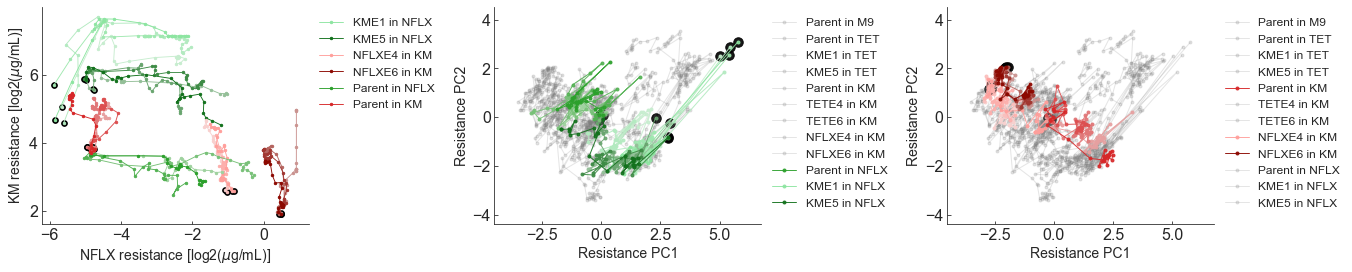

In [3]:
# Plot trajectories in the NFLX-KM and PCA space (Fig. S12)
roll_win = 3
alph = 0.2
matplotlib.rcParams.update({'legend.fontsize': 12})

sns_theme1 = "tab10"
sns_theme2 = "pastel"
sns_theme3 = "dark"

c_km1_nflx = "light:" + sns.color_palette(sns_theme2).as_hex()[2]
c_km5_nflx = "light:" + sns.color_palette(sns_theme3).as_hex()[2]
c_nflx4_km = "light:" + sns.color_palette(sns_theme2).as_hex()[3]
c_nflx6_km = "light:" + sns.color_palette(sns_theme3).as_hex()[3]
c_parent_nflx = "light:" + sns.color_palette(sns_theme1).as_hex()[2]
c_parent_km = "light:" + sns.color_palette(sns_theme1).as_hex()[3]

plt.subplots(1, 3, figsize=(19, 4))

ax1 = plt.subplot(1, 3, 1)
stress1 = 'NFLX'
stress2 = 'KM'

df = pd.read_csv('./data/trajectories/strain1.csv', index_col=0)
plot_strain(37, 40, stress1, stress2, 'KME1 in NFLX',
            roll_win=roll_win, cmap_name=c_km1_nflx)
plot_strain(41, 44, stress1, stress2, 'KME5 in NFLX',
            roll_win=roll_win, cmap_name=c_km5_nflx)
plot_strain(25, 28, stress1, stress2, 'NFLXE4 in KM',
            roll_win=roll_win, cmap_name=c_nflx4_km)
plot_strain(29, 32, stress1, stress2, 'NFLXE6 in KM',
            roll_win=roll_win, cmap_name=c_nflx6_km)
plot_strain(33, 36, stress1, stress2, 'Parent in NFLX',
            roll_win=roll_win, cmap_name=c_parent_nflx)
plot_strain(13, 16, stress1, stress2, 'Parent in KM',
            roll_win=roll_win, cmap_name=c_parent_km)

plt.xlabel(stress1 + ' resistance [log2($\mu$g/mL)]', fontsize=14)
plt.ylabel(stress2 + ' resistance [log2($\mu$g/mL)]', fontsize=14)
plt.legend(frameon=False, bbox_to_anchor=(1., 1))
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2 = plt.subplot(1, 3, 2)
traj_pca_df = pd.DataFrame()
traj_pca_df = plot_pca_traj('Parent in M9',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('Parent in TET',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('KME1 in TET',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('KME5 in TET',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('Parent in KM',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('TETE4 in KM',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('TETE6 in KM',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('NFLXE4 in KM',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('NFLXE6 in KM',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('Parent in NFLX',
                            traj_pca_df=traj_pca_df,
                            c=c_parent_nflx,
                            zorder=3)
traj_pca_df = plot_pca_traj('KME1 in NFLX',
                            traj_pca_df=traj_pca_df,
                            c=c_km1_nflx,
                            zorder=3)
traj_pca_df = plot_pca_traj('KME5 in NFLX',
                            traj_pca_df=traj_pca_df,
                            c=c_km5_nflx,
                            zorder=3)
plt.xlim(traj_pca_df.iloc[:, 0].min() - 1, traj_pca_df.iloc[:, 0].max() + 1)
plt.ylim(traj_pca_df.iloc[:, 1].min() - 1, traj_pca_df.iloc[:, 1].max() + 1)
plt.xlabel('Resistance PC1', fontsize=14)
plt.ylabel('Resistance PC2', fontsize=14)
plt.legend(frameon=False, bbox_to_anchor=(1., 1))
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax3 = plt.subplot(1, 3, 3)
traj_pca_df = pd.DataFrame()
traj_pca_df = plot_pca_traj('Parent in M9',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('Parent in TET',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('KME1 in TET',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('KME5 in TET',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('Parent in KM',
                            traj_pca_df=traj_pca_df,
                            c=c_parent_km,
                            zorder=3)
traj_pca_df = plot_pca_traj('TETE4 in KM',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('TETE6 in KM',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('NFLXE4 in KM',
                            traj_pca_df=traj_pca_df,
                            c=c_nflx4_km,
                            zorder=3)
traj_pca_df = plot_pca_traj('NFLXE6 in KM',
                            traj_pca_df=traj_pca_df,
                            c=c_nflx6_km,
                            zorder=3)
traj_pca_df = plot_pca_traj('Parent in NFLX',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('KME1 in NFLX',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('KME5 in NFLX',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
plt.xlim(traj_pca_df.iloc[:, 0].min() - 1, traj_pca_df.iloc[:, 0].max() + 1)
plt.ylim(traj_pca_df.iloc[:, 1].min() - 1, traj_pca_df.iloc[:, 1].max() + 1)
plt.xlabel('Resistance PC1', fontsize=14)
plt.ylabel('Resistance PC2', fontsize=14)
plt.legend(frameon=False, bbox_to_anchor=(1., 1))
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig(str(save_path / "FigS12.pdf"), dpi=300, bbox_inches="tight")

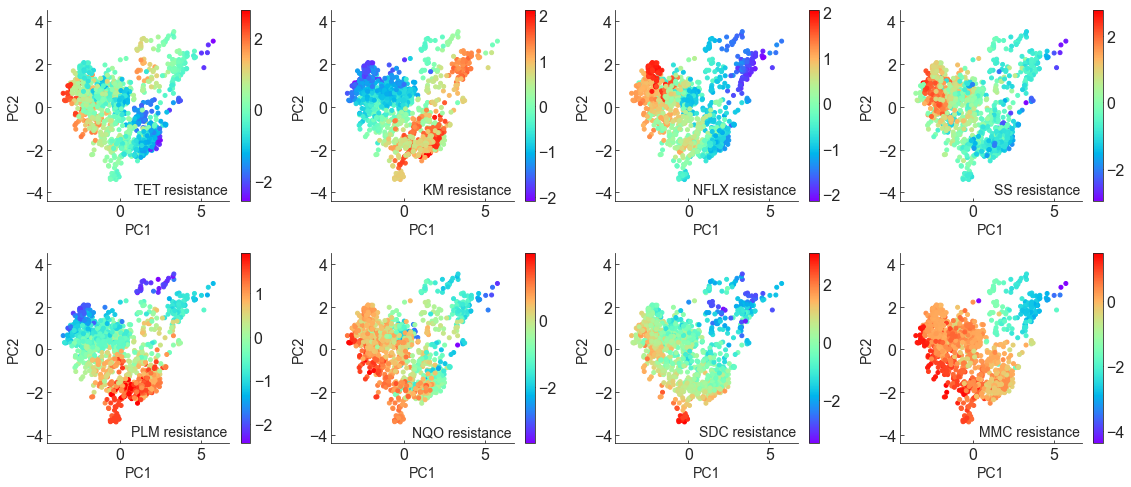

In [4]:
# Resistance values for each stress in the two-dimensional PCA space (Fig. S13)

plt.subplots(2, 4, figsize=(16, 7))
right, bottom = .99, .02

for i in range(8):
    ax = plt.subplot(2, 4, i+1)
    tet_km = full_df.iloc[:, i].values
    plt.scatter(pca_full_df[:, 0], pca_full_df[:, 1],
                c=tet_km, zorder=3, cmap='rainbow', s=16)

    plt.xlim(pca_full_df[:, 0].min()-1, pca_full_df[:, 0].max()+1)
    plt.ylim(pca_full_df[:, 1].min()-1, pca_full_df[:, 1].max()+1)
    plt.xlabel('PC1', fontsize=14)
    plt.ylabel('PC2', fontsize=14)
    plt.colorbar()
    ax.text(right,
            bottom,
            f"{stress_list[i]} resistance",
            horizontalalignment='right',
            verticalalignment='bottom',
            transform=ax.transAxes,
            fontsize=14,
            fontweight='normal')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig(str(save_path / "FigS13.pdf"), dpi=300, bbox_inches='tight')
plt.show()